In [1]:
%run '../rootlib.ipynb'

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
chain = R.TChain( "bbq" )
chain.Add( "bbq.root" )

1

In [3]:
c1 = Canvas( width=1000, height=500 )

In [21]:
def adcE( tube ):
    return "adcEast[" + str(tube) + "]"
def tdcE( tube ):
    return "tdcEast[" + str(tube) + "]"
def safeE( tubes ):
    ss = ""
    for tube in tubes :
        ss += tdcE( tube ) + " > 150 && " + adcE( tube ) + " > 10 &&"
    ss += "1"
    return ss
def adcW( tube ):
    return "adcWest[" + str(tube) + "]"
def tdcW( tube ):
    return "tdcWest[" + str(tube) + "]"
def safeW( tubes ):
    ss = ""
    for tube in tubes :
        ss += tdcW( tube ) + " > 300 && " + adcW( tube ) + " > 10 &&"
    ss += "1"
    return ss

30078.1285894
0.586945545245
(13.300480348325902, '+/-', 0.044838664863440236)


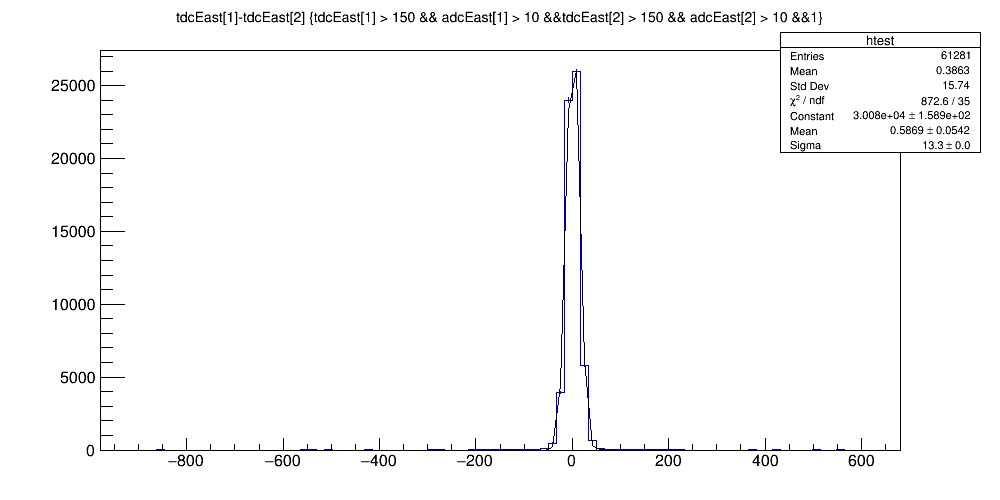

In [5]:
chain.Draw( tdcE(1) +"-" + tdcE(2) +">>htest", safeE([1, 2]), "h" )
htest = R.gDirectory.Get( "htest" )
R.gStyle.SetOptFit(111)
ff = R.TF1( "fgaus", "gaus" )
htest.Fit( ff )
print( ff.GetParameter( 0 ) )
print( ff.GetParameter( 1 ) )
print( ff.GetParameter( 2 ), "+/-", ff.GetParError( 2 ) )

c1

In [22]:
def sigma_diff_E( tubeA, tubeB ) :
    chain.Draw( tdcE(tubeA) +"-" + tdcE(tubeB) +">>temp(400, -200, 200)", safeE([tubeA, tubeB]), "h" )
    temp = R.gDirectory.Get( "temp" )
    ff = R.TF1( "fgaus", "gaus" )
    temp.Fit( ff )
    return ( ff.GetParameter( 2 ), ff.GetParError( 2 ) )
def sigma_diff_W( tubeA, tubeB ) :
    chain.Draw( tdcW(tubeA) +"-" + tdcW(tubeB) +">>temp(400, -200, 200)", safeW([tubeA, tubeB]), "h" )
    temp = R.gDirectory.Get( "temp" )
    ff = R.TF1( "fgaus", "gaus" )
    temp.Fit( ff )
    return ( ff.GetParameter( 2 ), ff.GetParError( 2 ) )

In [23]:
sigma_diff_W( 3, 2 )

(23.564529077048228, 0.08128594163620306)

In [24]:
def make_sigma_plot( tubeA ) :
    hSigmas = R.TH1D( "sigmas_" + str(tubeA), "sigmas " + str(tubeA) + "; TubeB; sigma( TubeA - tubeB )", 20, 0, 20 )
    for tB in range( 0, 16 ) :
        if tB == tubeA : continue
        if tB == 0 or tB == 4 or tB == 8 or tB ==12 : continue
            
        sig = sigma_diff_E( tubeA, tB )
        hSigmas.SetBinContent( tB+1, sig[0] )
        hSigmas.SetBinError( tB+1, sig[1] )
        
    return hSigmas
def make_sigma_plotW( tubeA ) :
    hSigmas = R.TH1D( "sigmasW_" + str(tubeA), "sigmas " + str(tubeA) + "; TubeB; sigma( TubeA - tubeB )", 20, 0, 20 )
    for tB in range( 0, 16 ) :
        if tB == tubeA : continue
        if tB == 0 or tB == 4 or tB == 8 or tB ==12 : continue
            
        sig = sigma_diff_W( tubeA, tB )
        hSigmas.SetBinContent( tB+1, sig[0] )
        hSigmas.SetBinError( tB+1, sig[1] )
        
    return hSigmas

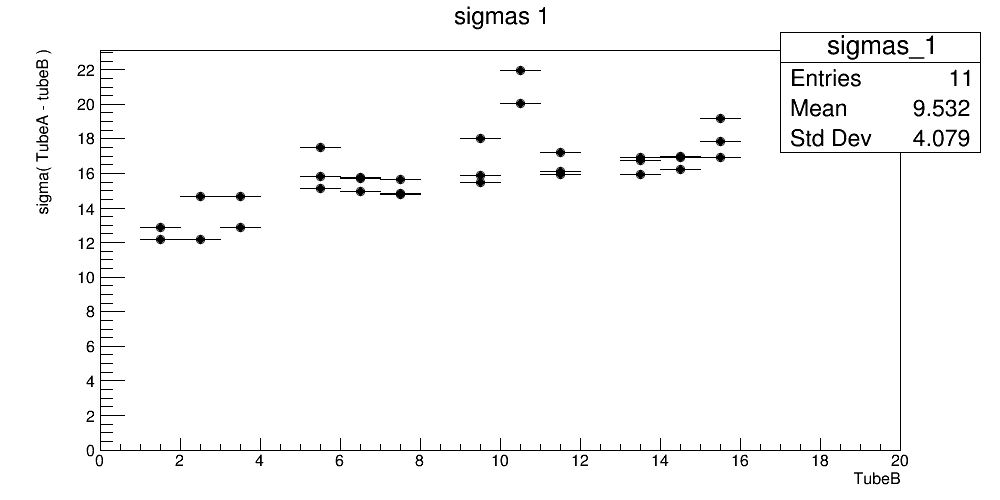

In [11]:
hsig1 = make_sigma_plot( 1 )
hsig2 = make_sigma_plot( 2 )
hsig3 = make_sigma_plot( 3 )
hsig1.Draw( "pe")
hsig2.Draw( "pe same")
hsig3.Draw( "pe same")
c1

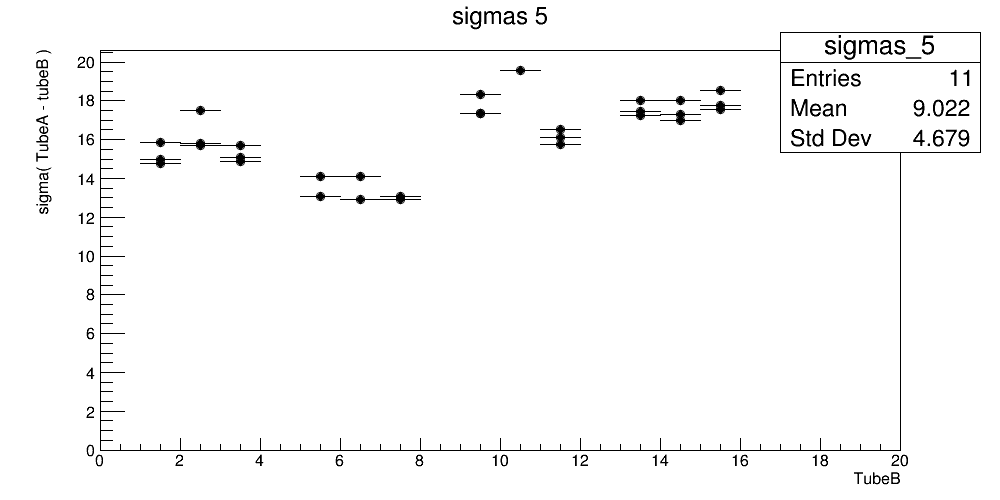

In [12]:
hsig5 = make_sigma_plot( 5 )
hsig6 = make_sigma_plot( 6 )
hsig7 = make_sigma_plot( 7 )
hsig5.Draw( "pe")
hsig6.Draw( "pe same")
hsig7.Draw( "pe same")
c1

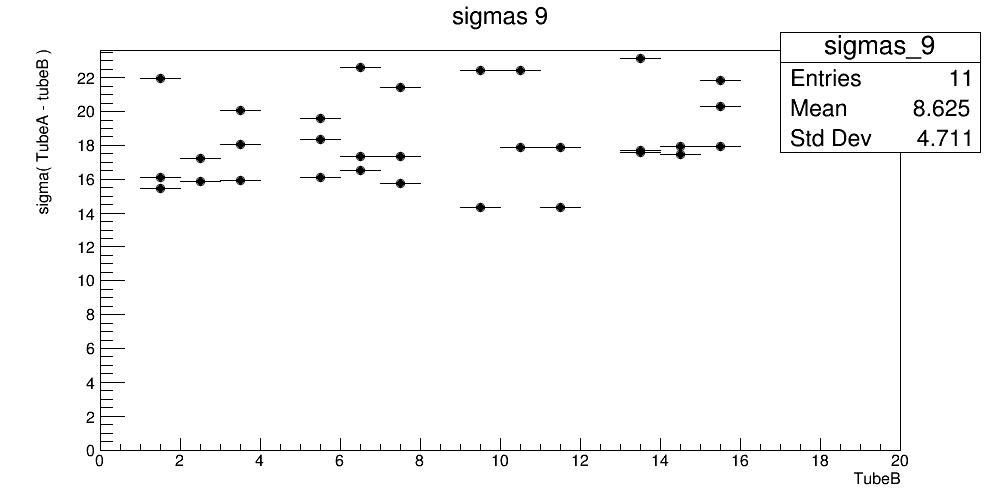

In [13]:
hsig9 = make_sigma_plot( 9 )
hsig10 = make_sigma_plot( 10 )
hsig11 = make_sigma_plot( 11 )
hsig9.Draw( "pe")
hsig10.Draw( "pe same")
hsig11.Draw( "pe same")
c1

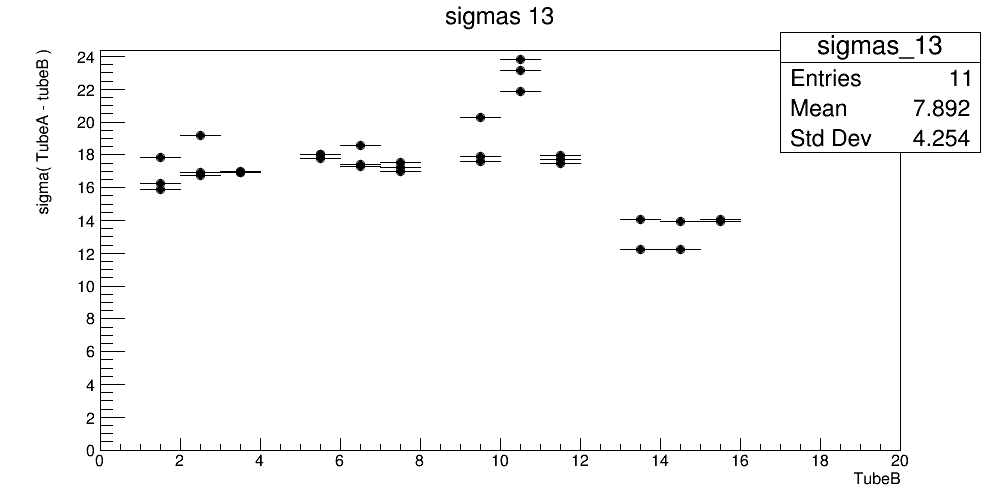

In [14]:
hsig13 = make_sigma_plot( 13 )
hsig14 = make_sigma_plot( 14 )
hsig15 = make_sigma_plot( 15 )
hsig13.Draw( "pe")
hsig14.Draw( "pe same")
hsig15.Draw( "pe same")
c1

In [2]:
import numpy as np

In [4]:
np.sqrt( 28**2 + 18**2 )

33.286633954186478

In [35]:
np.sqrt( 30**2 + 18**2)

34.985711369071801

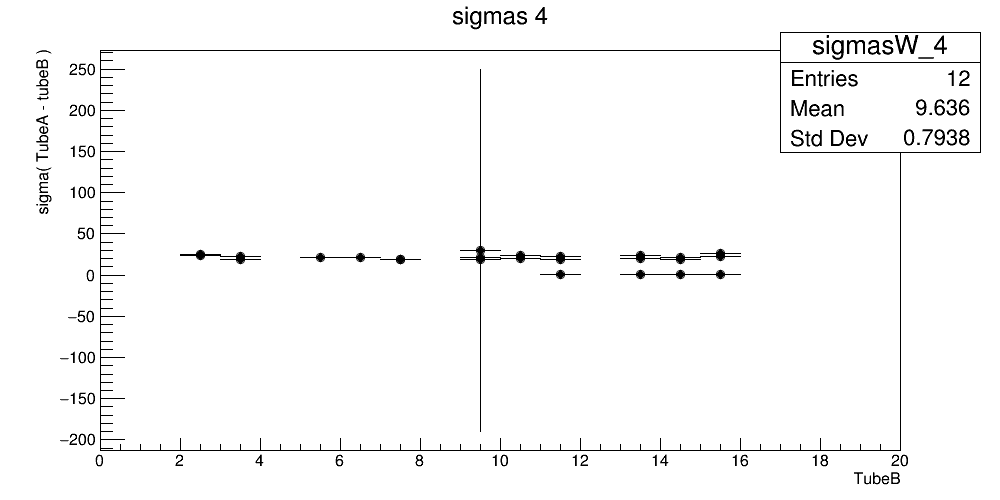

In [25]:
hsig1 = make_sigma_plotW( 4 )
hsig2 = make_sigma_plotW( 5 )
hsig3 = make_sigma_plotW( 6 )
hsig1.Draw( "pe")
hsig2.Draw( "pe same")
hsig3.Draw( "pe same")
c1

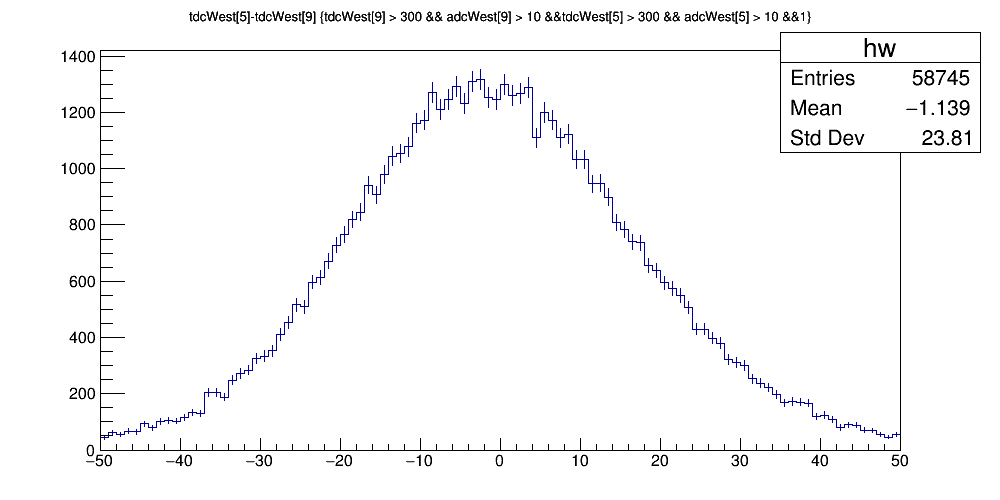

In [35]:
chain.Draw( tdcW(5) + "-" + tdcW(9) + ">> hw( 100, -50, 50 )", safeW([9, 5]), "h" )
c1

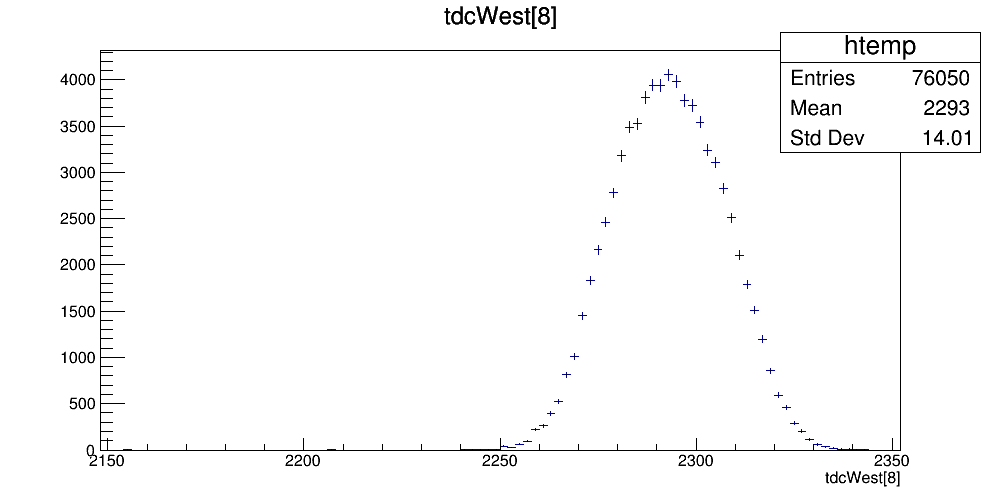

In [40]:
chain.Draw( tdcW(8) )
c1

